In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.constants as const

import Bell_EBM as ebm

# First, let's setup a planet, star, and system

In [2]:
# WASP-12b system
planet = ebm.Planet('bell2018', Porb=1.09142030, a=0.02340, rad=1.900, mass=1.470, vWind=5e3, inc=83.37)  # WASP-12b
star = ebm.Star(teff=6300, rad=1.59, mass=1.20) # WASP-12star2 = ebm.Star()
system = ebm.System(star, planet)

# Let's show the star-planet system

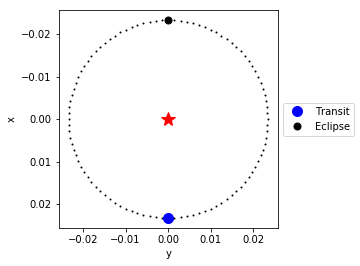

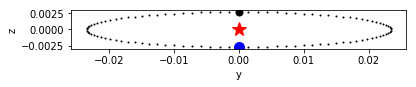

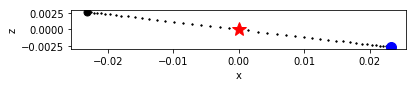

In [3]:
planet.orbit.show_orbit()

# Now, let's model the planet's atmoshere

In [4]:
# Run initial burn-in - try guessing the median irradiation temperature to begin with
FincMed = np.median(system.Finc(np.linspace(0,system.planet.Porb,1000, endpoint=False).reshape(-1,1)), axis=0)
T0 = (FincMed/const.sigma_sb.value)**0.25
t0 = 0
t1 = system.planet.Porb*20
dt = system.planet.Porb/10
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

# Run a higher time resolution burn-in to clean up any remaining mess
T0 = maps[-1]
t0 = times[-1]
t1 = t0+system.planet.Porb*20
dt = system.planet.Porb/100
times, maps = system.runModel(T0, t0, t1, dt, verbose=False)

# Then we can visualize the planet's map

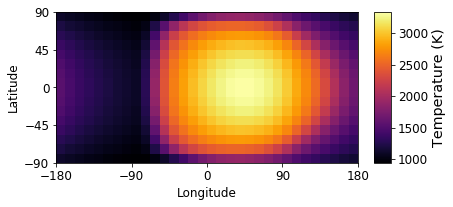

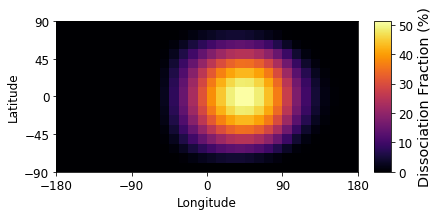

In [5]:
fig = system.planet.showMap()
plt.show()
plt.close()

fig = system.planet.showDissociation()
plt.show()
plt.close()

# Finally, we can look at the orbital phase curve

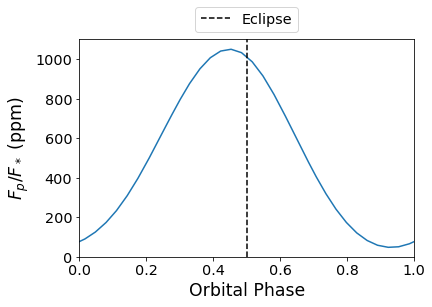

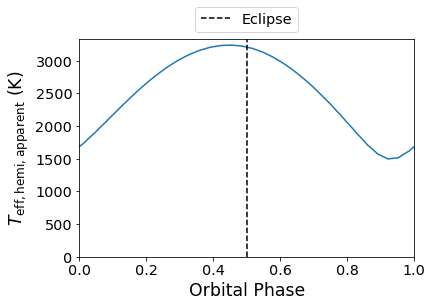

In [6]:
# Plot the lightcurves
fig = system.plot_lightcurve()
plt.show()
plt.close()

# Plot the temperature curves
fig = system.plot_tempcurve()
plt.show()
plt.close()